#### Setup

In [2]:
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 16})
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})


dfHE = pd.read_excel("https://wedocs.unep.org/bitstream/handle/20.500.11822/35355/FWD.xlsx", 
                   sheet_name = 'Household Estimates',skiprows=1,skipfooter=1 ).dropna().set_index('Country')
dfHE = dfHE.rename(columns={
    'Household estimate (kg/capita/year)':'Household Person',
    'Household estimate (tonnes/year)':'Household Country'
})
dfFSE = pd.read_excel("https://wedocs.unep.org/bitstream/handle/20.500.11822/35355/FWD.xlsx", 
                   sheet_name = 'Food Service Estimates',skiprows=1,skipfooter=1).dropna().set_index('Country')
dfFSE = dfFSE.rename(columns={
    'Food service estimate (kg/capita/year)':'Food service Person',
    'Food service estimate (tonnes/year)':'Food service Country'
})
dfRE = pd.read_excel("https://wedocs.unep.org/bitstream/handle/20.500.11822/35355/FWD.xlsx", 
                   sheet_name = 'Retail Estimates',skiprows=1,skipfooter=1).dropna().set_index('Country')
dfRE = dfRE.rename(columns={
    'Retail estimate (kg/capita/year)':'Retail Person',
    'Retail estimate (tonnes/year)':'Retail Country'
})


In [3]:

dfC = pd.concat([
    dfHE[['Household Person','Household Country']],
    dfFSE[['Food service Person','Food service Country']],
    dfRE[['Retail Person','Retail Country']]
],axis=1)
dfC = dfC[~dfC.eq('*').any(1)].reset_index()

personCols = ['Household Person','Food service Person','Retail Person'];
countryCols = ['Household Country','Food service Country','Retail Country'];
dfC['Person Total'] = dfC[personCols].sum(axis=1)
dfC['Country Total'] = dfC[countryCols].sum(axis=1)
dfC['Country Total Million'] = dfC['Country Total']/1000000
for name in countryCols:
    dfC[name+' Million'] = dfC[name]/1E6;

dfC['Wasted Food (tonnes)'] = dfC['Country Total'].apply(lambda x: ("{:,}".format(round(x))))
    
dfC = dfC.replace(to_replace ="United States of America", 
                 value ="USA") ;
dfC['retail-frac'] = dfC['Retail Person']/dfC['Person Total']
dfC['household-frac'] = dfC['Household Person']/dfC['Person Total']
dfC['service-frac'] = dfC['Food service Person']/dfC['Person Total']

df_pop = pd.read_csv('https://raw.githubusercontent.com/datasets/population/master/data/population.csv')
df_pop = df_pop.loc[df_pop['Year']==2018]
usTotalFood = dfC.loc[dfC['Country']=='USA']['Country Total'].values[0]
df_pop['diff'] = usTotalFood - df_pop['Value']
df_pop['Population'] = df_pop['Value'].apply(lambda x: ("{:,}".format(round(x))))

def compareCountries(countriesList,stacked=False):
    fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(14,6))
    fig.suptitle('Food wasted in a year')
    dfC.loc[dfC['Country'].isin(countriesList)].plot.bar('Country',personCols,stacked=stacked,rot=60,ax=ax1,
        title='Per Person',ylabel='kilograms',legend=False);
    dfC.loc[dfC['Country'].isin(countriesList)].plot.bar('Country',[name+' Million' for name in countryCols],stacked=stacked,rot=60,ax=ax2,
        title='Total Country',ylabel='million tons',legend=False);
    ax2.legend(['Household','Food service','Retail']);
    fig.subplots_adjust(wspace = .3)

def compareCountriesSum(countriesList):
    fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(14,6))
    fig.suptitle('Food wasted in a year')
    dfC.loc[dfC['Country'].isin(countriesList)].plot.bar('Country','Person Total',rot=60,ax=ax1,
        title='Per Person',ylabel='kilograms',legend=False);
    dfC.loc[dfC['Country'].isin(countriesList)].plot.bar('Country','Country Total Million',rot=60,ax=ax2,
        title='Total Country',ylabel='million tons',legend=False);
    fig.subplots_adjust(wspace = .3)

    
def countryExtremes():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
    fig.suptitle('Total food wasted in TOTAL COUNTRY')
    dfC.sort_values('Country Total',ascending=False).head(6).plot.bar('Country','Country Total Million',
        legend=False,title='Most wasted food by a country',xlabel='',rot=60,ylabel='Millions of tonnes',
        color='red',ax=ax1);
    dfC.sort_values('Country Total',ascending=True).head(6).iloc[::-1].plot.bar('Country','Country Total',
        legend=False,title='Least wasted food by a country',xlabel='',rot=60,ylabel='tonnes',ax=ax2);
    fig.subplots_adjust(wspace = .3)
    
def personExtremes():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
    colors = ['r','b','g','y','m','c']
    fig.suptitle('Food wasted in a year PER PERSON')
    dfC.sort_values('Person Total',ascending=False).head(6).plot.bar('Country','Person Total',
        color='red',legend=False,title='Most wasted food per person',rot=60,xlabel='',ylabel='Kilograms',ax=ax1);
    dfC.sort_values('Person Total',ascending=True).head(6).iloc[::-1].plot.bar('Country','Person Total',
        legend=False,title='Least wasted food per person',xlabel='',rot=60,ylabel='Kilograms',ax=ax2);

    fig.subplots_adjust(wspace = .3)

    
def hprint(num,post=''):
    print(("{:,}".format(round(num)))+ ' ' + post)
    

def getValue(country,col):
    if 'Country' in col:
        post = 'tonnes per year'
    else:
        post = 'kilograms per person per year'
    val = dfC.loc[dfC['Country']==country][col].values[0]
    hprint(val,post=post)
    return val;


# Food Wasted by Country

## First let's put the numbers in perspective

### How much TOTAL food does the US waste each year

In [4]:
usTotalFood = getValue('USA','Country Total')

45,446,092 tonnes per year


The US wastes around 45 million tonnes of food each year.

The giant dinosaur Brachiosaurus is estimated to have weighed around 45 tonnes.<br>So if you piled up all the food wasted by the US in a year, it would weigh as much as <b>one million Brachiosauruses!</b>

<div>
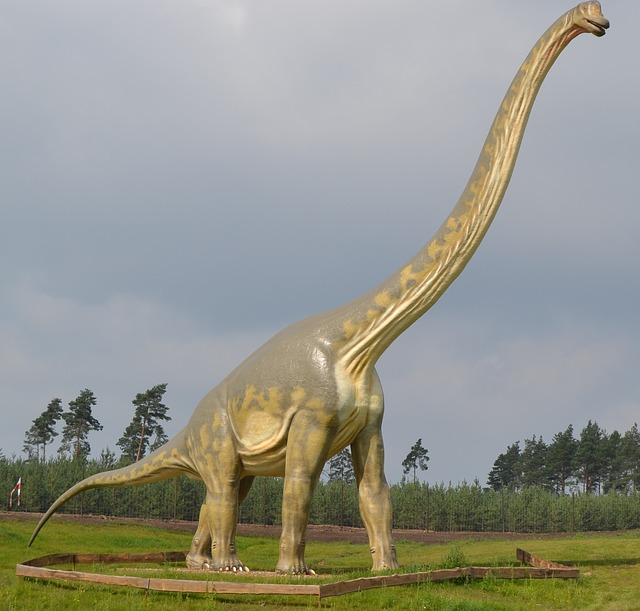
</div>

#### Which Countries could be completely fed by the our wasted food?

If each person eats 2 kilograms a day, then in a year they eat

In [5]:
dailyFood = 2 #kg of food per person per day
hprint(dailyFood * 365,'kilograms per year')

730 kilograms per year


Let's round that up to 1,000 kg which is equal to a metric ton (tonne).

How much total food does the US waste each year?

In [6]:
getValue('USA','Country Total');

45,446,092 tonnes per year


If each person eats 1 tonne a year, then 45 million tonnes of food could feed 45 million people for a year.

The yearly wasted food in the US could feed these entire countries for a year:

In [7]:
# population data from 2018
df_pop.loc[df_pop['diff']>0].sort_values('diff')[['Country Name','Population']].head(5).style.set_properties(**{'font-size':'14pt'})

,Country Name,Population
14671,Ukraine,"44,622,516"
3185,Argentina,"44,494,502"
14612,Uganda,"42,723,139"
2890,Algeria,"42,228,429"
13609,Sudan,"41,801,533"


### How much PER PERSON food does the US waste each year

In [8]:
usPersonFood = getValue('USA','Person Total')

138 kilograms per person per year


That's about

In [9]:
hprint( usPersonFood * 2.2,'pounds')

304 pounds


That's about what an adult gorilla weighs! <br> So every person in the US wastes about one gorilla worth of food each year.

<div>
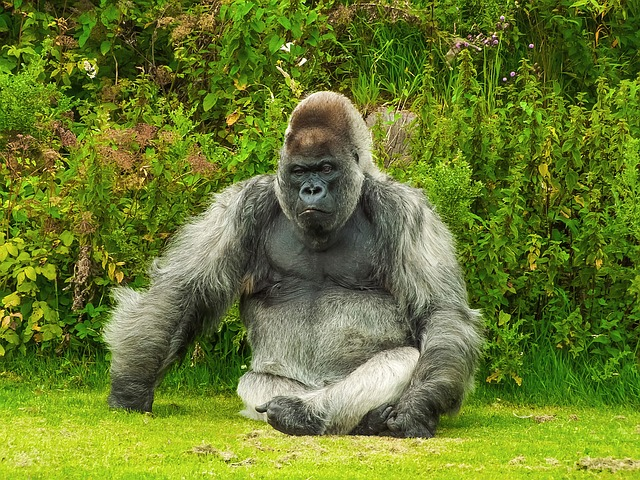
</div>

#### How long could we survive off of our wasted food?

If the average person eats about 2 kilograms of food per day, then the wasted food could feed each person for 

In [10]:
hprint(usPersonFood/dailyFood,'days')

69 days


There is enough food waste in the US to feed every person for over two months each year!

## Comparing Countries

We can look at which countries waste the most food, and which waste the least.

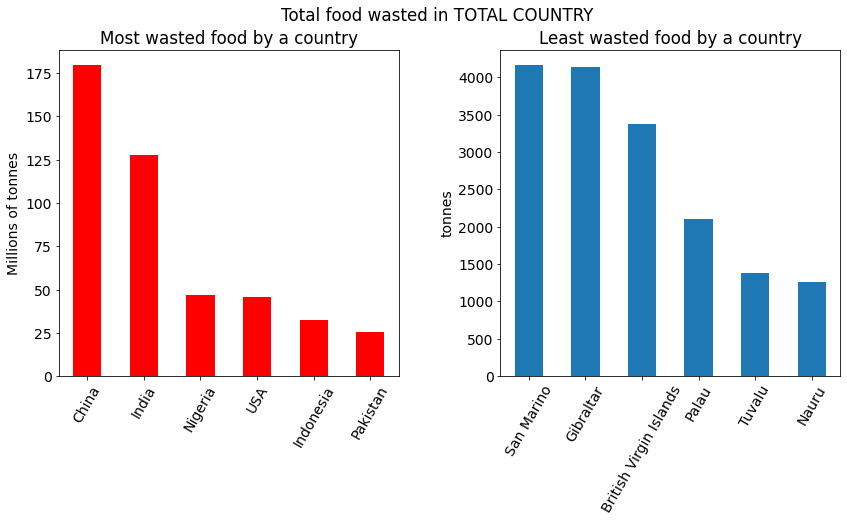

In [11]:
countryExtremes()

This doesn't tell us a whole lot because countries with bigger populations will waste more food.

To find out which country is the most wasteful we need to look at how much one person in the country wastes.

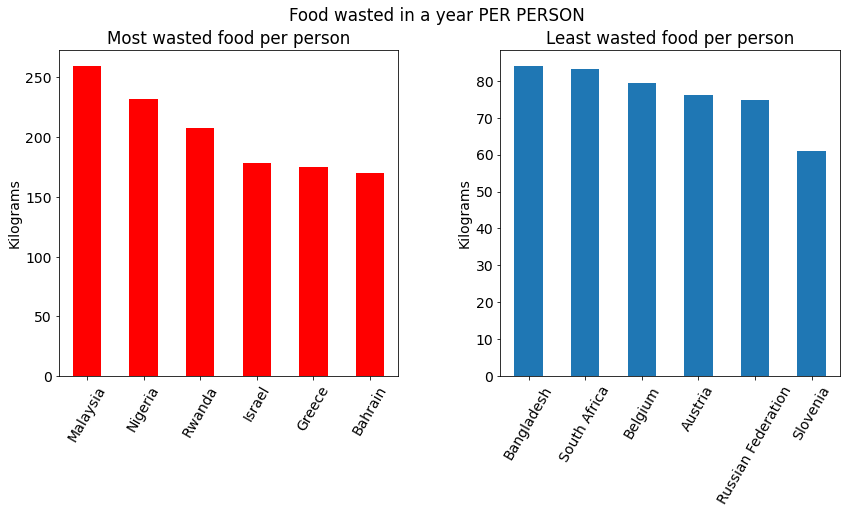

In [12]:
personExtremes()

In [13]:
malaysia = getValue('Malaysia','Person Total')
slovenia = getValue('Slovenia','Person Total')

260 kilograms per person per year
61 kilograms per person per year


In Malaysia each person wastes about 260 kilograms of food per year, while in Slovenia the average person wastes only 61 kilograms of food per year

In [14]:
malaysia/slovenia

4.260852888752114

Malaysia wastes over 4 times as much food per person as Slovenia!

## Total Waste vs Per Person Waste

We saw above the the top and bottom TOTAL wasters do not match exactly with the top and bottom PER PERSON wasters.<br>Let's compare a few countries more carefully.

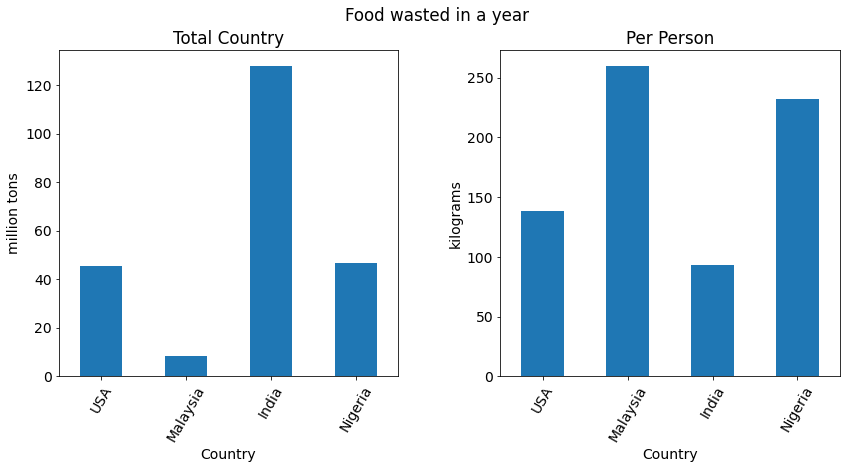

In [15]:
compareCountriesSum(['USA','Malaysia','India','Nigeria'])

#### What are some interesting things these two plots tell us?

* India wastes the most total, but the least per-person.  India must have a lot of people.
* Malaysia wastes the least total, but the most per-person.  Malaysia is very wasteful but does not have many people.

## Look at where the food is being wasted

The wasted food can come from three sources:
* Household - food wasted at home
* Food service  - food wasted at restaurants
* Retail - food wasted at grocery stores

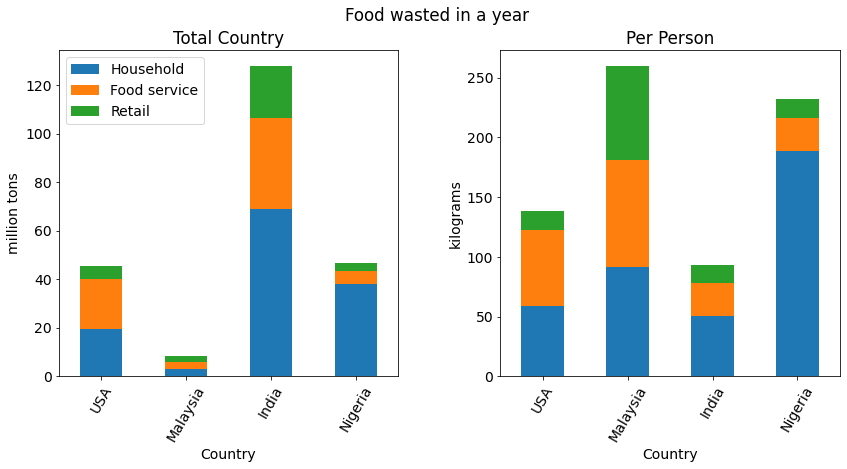

In [16]:
compareCountries(['USA','Malaysia','India','Nigeria'],stacked=True)

It's a big difficult to compare the size of the colored pieces, so let's unstack them 

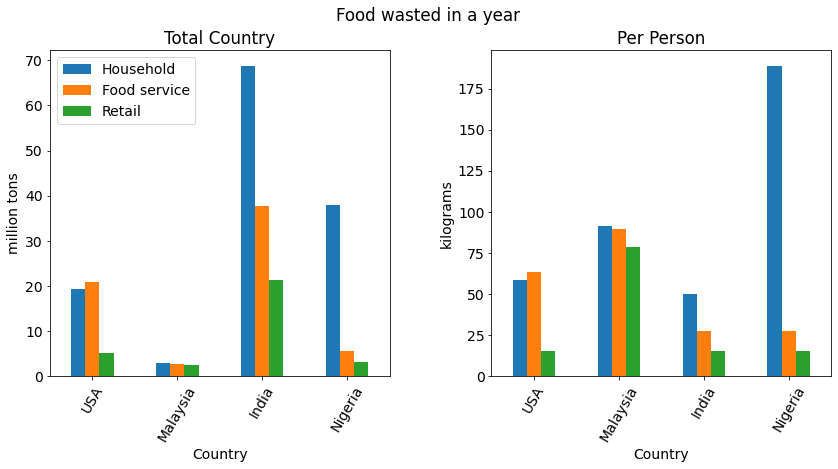

In [17]:
compareCountries(['USA','Malaysia','India','Nigeria'],stacked=False)

#### What are some interesting things these two plots tell us?

* Nigeria wastes by far the most at home.  They should focus on decreasing household waste.
* Malaysia wastes pretty evenly across categories.  They should decrease waste in all areas.